In [1]:
# Import necessary libraries

#! pip install pycaret full 
import pycaret
#! pip install pandas
from pycaret.regression import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Import dataset & choosing desired parameters to analyze
df = pd.read_csv("Database.csv")
df = df[['Micro Pollutant', 'MP Category', 'Initial Concentration of MP (mg/L)', 'Compound MW (g/mol)', 'Compound Charge', 'Initial FS pH', 'Initial DS pH','Type of MB', 'MB Contact Angle (°)', 'MB Zeta Potential (mV)', 'Draw Solution', 'DS MW (g mol-1)', 'DS Concentration (M)', 'Operating Time (h)', 'Cross Flow Velocity (cm/s)','Water Flux, Jw (LMH)','Reverse Salt Flux, Js (gMH)','Temperature (⁰C)', 'Removal Rate (%)']]
df

,Micro Pollutant,MP Category,Initial Concentration of MP (mg/L),Compound MW (g/mol),Compound Charge,Initial FS pH,Initial DS pH,Type of MB,MB Contact Angle (°),MB Zeta Potential (mV),Draw Solution,DS MW (g mol-1),DS Concentration (M),Operating Time (h),Cross Flow Velocity (cm/s),"Water Flux, Jw (LMH)","Reverse Salt Flux, Js (gMH)",Temperature (⁰C),Removal Rate (%)
0,Atenolol,β-Blockers,0.01000,266.34,1,7.05,NaN,HTI CTA FO,79.5,-6.87,Monoammonium phosphate (MAP),115.00,1.0,10.0,8.5,7.7,0.08,20.0,80
1,Atrazine,Herbicide,0.01000,216.00,0,7.05,NaN,HTI CTA FO,79.5,-6.87,Monoammonium phosphate (MAP),115.00,1.0,10.0,8.5,7.7,0.08,20.0,77
2,Primidone,Anticonvulsant,0.01000,218.00,0,7.05,NaN,HTI CTA FO,79.5,-6.87,Monoammonium phosphate (MAP),115.00,1.0,10.0,8.5,7.7,0.08,20.0,90
3,Caffeine,Stimulant,0.01000,194.00,0,7.05,NaN,HTI CTA FO,79.5,-6.87,Monoammonium phosphate (MAP),115.00,1.0,10.0,8.5,7.7,0.08,20.0,81
4,Atenolol,β-Blockers,0.01000,266.34,1,7.05,NaN,HTI CTA FO,79.5,-6.87,Monoammonium phosphate (MAP),115.00,2.0,10.0,8.5,9.5,0.08,20.0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Sulfamethoxazole,Antibiotics,0.01220,253.28,-1,7.00,NaN,Aquaporin FO,26.4,NaN,NaCl,58.44,0.7,2.5,17.5,10.0,2.00,20.0,100
230,Trimethoprim,Antibiotics,0.01070,290.32,1,7.00,NaN,Aquaporin FO,26.4,NaN,NaCl,58.44,0.7,2.5,17.5,10.0,2.00,20.0,99
231,Carbamazepine,Anticonvulsant,0.01370,236.27,0,7.00,NaN,Aquaporin FO,26.4,NaN,NaCl,58.44,0.7,2.5,17.5,10.0,2.00,20.0,100
232,Ibuprofen,Nonsteroidal anti-inflammatory,0.01220,206.29,-1,7.00,NaN,Aquaporin FO,26.4,NaN,NaCl,58.44,0.7,2.5,17.5,10.0,2.00,20.0,100


In [3]:
# Exploratory Data Analysis (EDA)
# Describing main statistical features of parameters in dataset
df.describe()

,Initial Concentration of MP (mg/L),Compound MW (g/mol),Compound Charge,Initial FS pH,Initial DS pH,MB Contact Angle (°),MB Zeta Potential (mV),DS MW (g mol-1),DS Concentration (M),Operating Time (h),Cross Flow Velocity (cm/s),"Water Flux, Jw (LMH)","Reverse Salt Flux, Js (gMH)",Temperature (⁰C),Removal Rate (%)
count,2.240000e+02,234.000000,234.000000,234.000000,55.000000,234.000000,165.000000,234.000000,221.000000,234.000000,221.000000,234.000000,221.000000,228.000000,234.000000
mean,4.879809e-02,260.479060,0.064103,6.789744,7.189091,55.359829,-11.484121,90.669487,1.155656,21.224359,10.827602,9.391026,3.623258,21.429825,82.226496
std,2.019484e-01,133.521286,0.578731,0.646003,0.343011,17.638852,15.662298,85.733062,0.585528,19.287354,8.429575,3.958994,2.753642,1.347010,23.953907
min,5.000000e-07,74.000000,-1.000000,6.000000,7.000000,26.400000,-55.000000,58.440000,0.500000,2.500000,1.300000,4.000000,0.070000,20.000000,4.000000
25%,7.500000e-04,194.200000,0.000000,6.000000,7.000000,43.800000,-8.000000,58.440000,0.700000,10.000000,8.500000,6.000000,1.100000,20.000000,79.250000
50%,9.660000e-03,249.090000,0.000000,7.000000,7.000000,64.000000,-6.000000,58.440000,1.000000,24.000000,9.000000,9.460000,3.500000,21.000000,92.500000
75%,1.000000e-02,277.400000,0.000000,7.050000,7.000000,64.000000,-2.740000,74.600000,2.000000,25.000000,9.000000,11.010000,5.500000,22.500000,98.000000
max,1.266500e+00,821.140000,1.000000,8.000000,7.800000,79.500000,-2.740000,430.180000,2.000000,96.000000,58.800000,27.500000,8.500000,24.000000,100.000000


In [4]:
desc.to_csv('describe.csv')

NameError: name 'desc' is not defined

In [ ]:
df.dtypes

<Figure size 2500x2500 with 0 Axes>

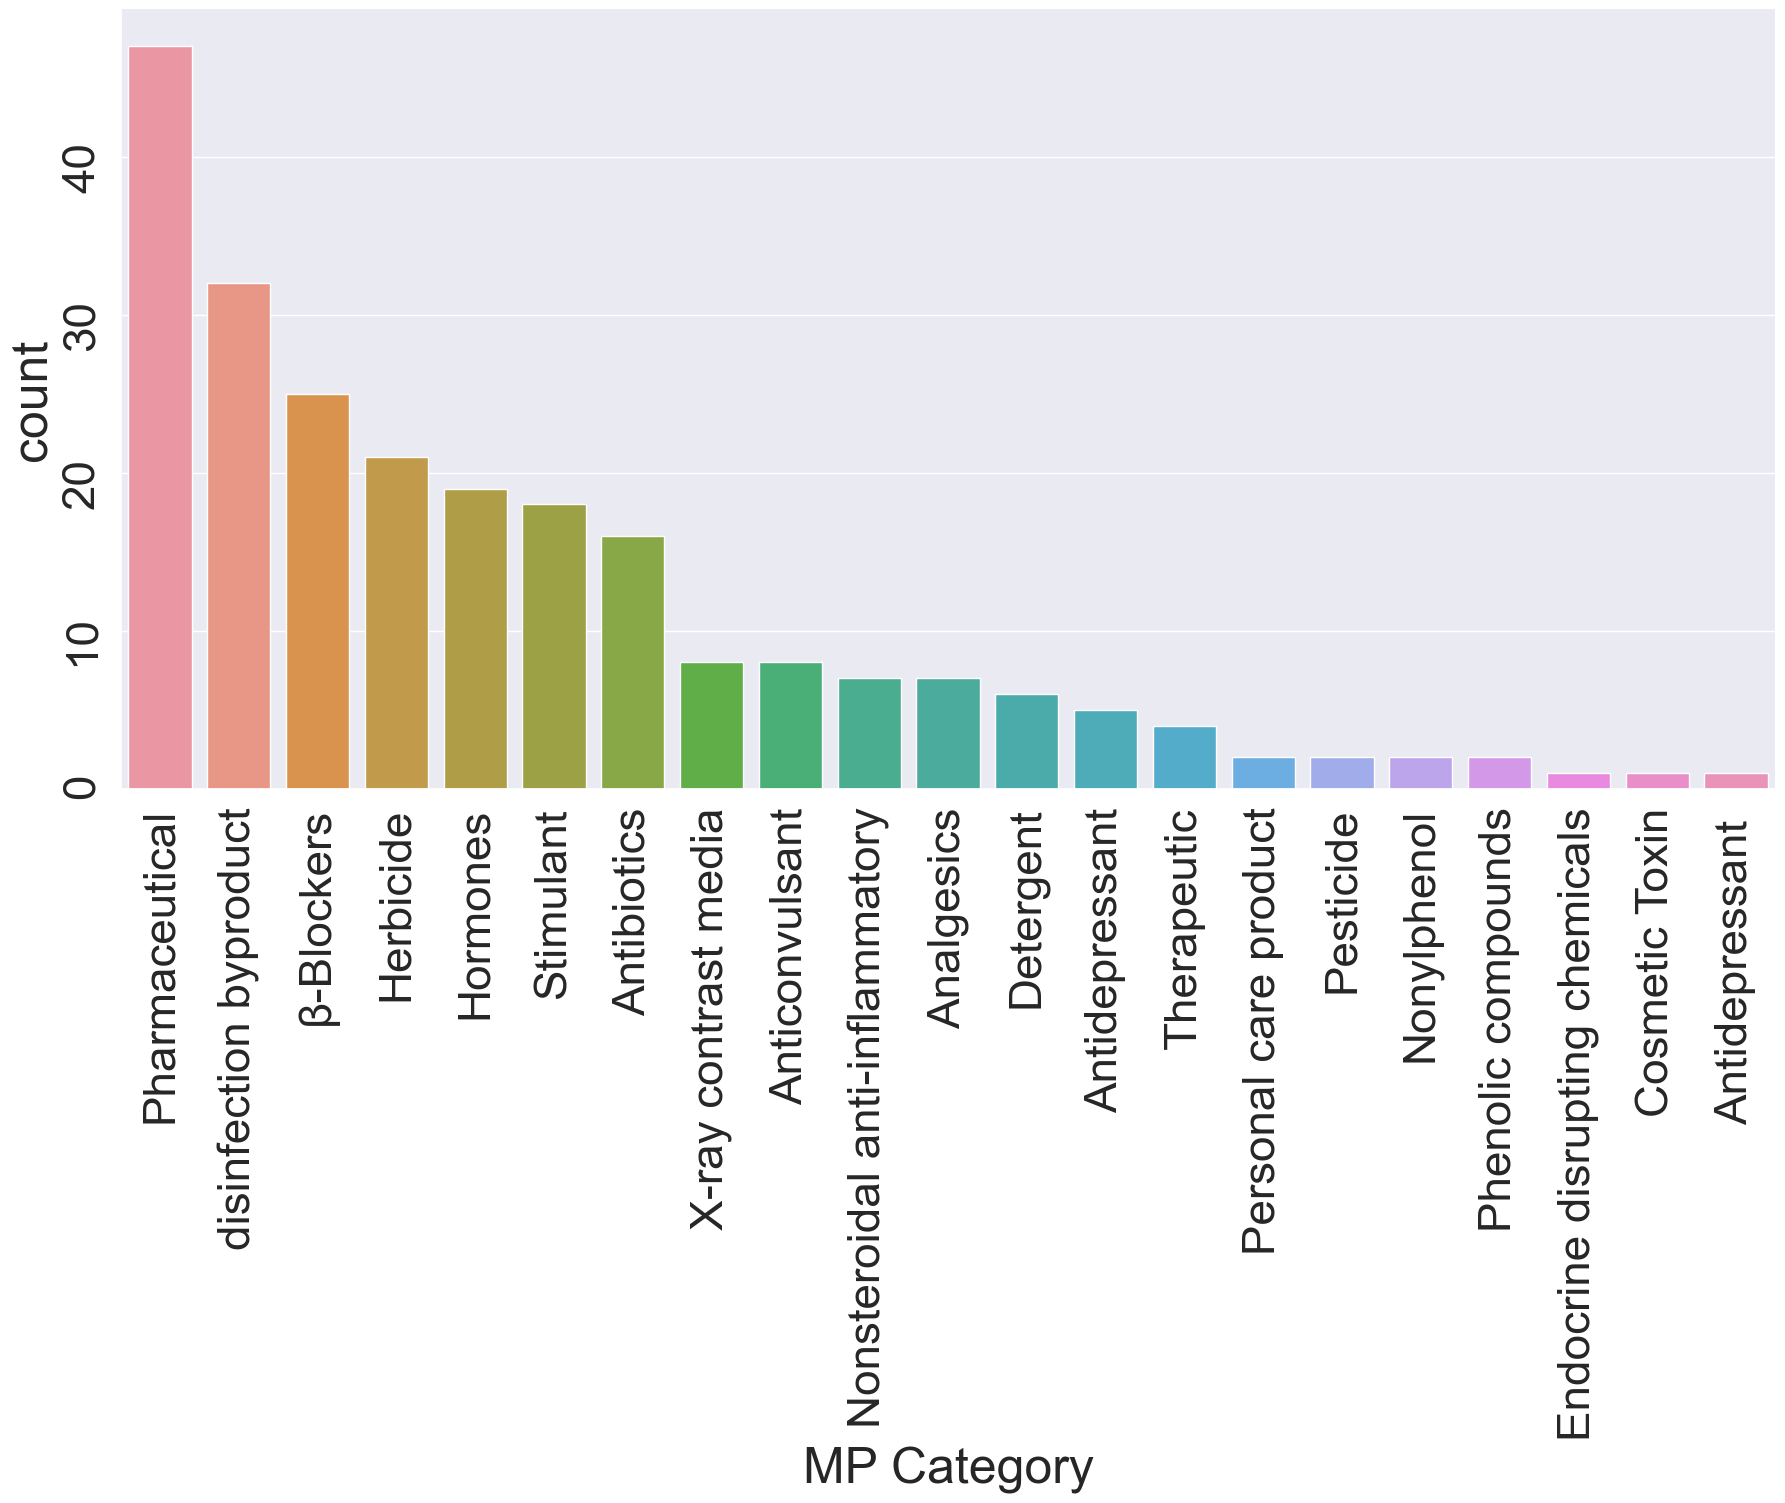

<Figure size 2500x2500 with 0 Axes>

In [26]:
# EDA: Different micro pollutant categories observed 
sns.set(font_scale=3)
category_order = df['MP Category'].value_counts().sort_values(ascending=False).index

ax=sns.catplot(x='MP Category' ,kind="count",data=df,order=category_order, height=10, aspect=2)

plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.figure(figsize=(25,25))


[Text(0, 0, 'Atenolol'),
 Text(1, 0, 'Atrazine '),
 Text(2, 0, 'Primidone'),
 Text(3, 0, 'Caffeine'),
 Text(4, 0, '1,4-Dioxane'),
 Text(5, 0, 'Acetaminophen'),
 Text(6, 0, 'Metronidazole'),
 Text(7, 0, 'Phenazone'),
 Text(8, 0, 'Bisphenol A'),
 Text(9, 0, 'Carbamazepine'),
 Text(10, 0, '17α-Ethynilestradiol'),
 Text(11, 0, 'Ibuprofen '),
 Text(12, 0, 'Naproxen'),
 Text(13, 0, 'Fenoprofen'),
 Text(14, 0, 'Gemfibrozil'),
 Text(15, 0, 'Ketoprofen'),
 Text(16, 0, 'Phenol'),
 Text(17, 0, '4-propylphenol'),
 Text(18, 0, 'Sulfamethoxazole'),
 Text(19, 0, 'Salycylic Acid'),
 Text(20, 0, 'Paracetamol'),
 Text(21, 0, 'Polyparaben'),
 Text(22, 0, 'Meprobamate'),
 Text(23, 0, 'Dilantin'),
 Text(24, 0, 'Triamterene'),
 Text(25, 0, 'Amitriptyline'),
 Text(26, 0, 'Triclosan'),
 Text(27, 0, 'Trimethoprim'),
 Text(28, 0, 'Diclofenac'),
 Text(29, 0, 'Fluoxetine'),
 Text(30, 0, 'Triclocarban'),
 Text(31, 0, 'Clozapine'),
 Text(32, 0, 'Omeprazole'),
 Text(33, 0, 'Hydroxyzine'),
 Text(34, 0, 'Risperidone')

<Figure size 2500x2500 with 0 Axes>

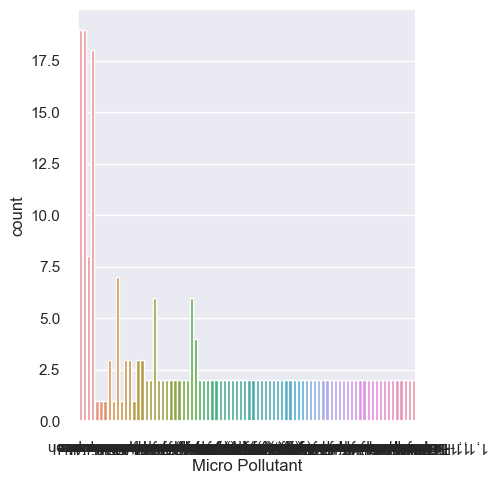

In [19]:
plt.figure(figsize=(25,25))
sns.catplot(x='Micro Pollutant',kind="count", data=df)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=180)



In [9]:
# Setting up the model by choosing water flux (Jw) as the prediction target

setup(data = df,target = 'Water Flux, Jw (LMH)',session_id = 123)

,Description,Value
0,Session id,123
1,Target,"Water Flux, Jw (LMH)"
2,Target type,Regression
3,Original data shape,"(234, 17)"
4,Transformed data shape,"(234, 45)"
5,Transformed train set shape,"(163, 45)"
6,Transformed test set shape,"(71, 45)"
7,Numeric features,12
8,Categorical features,4
9,Rows with missing values,12.4%


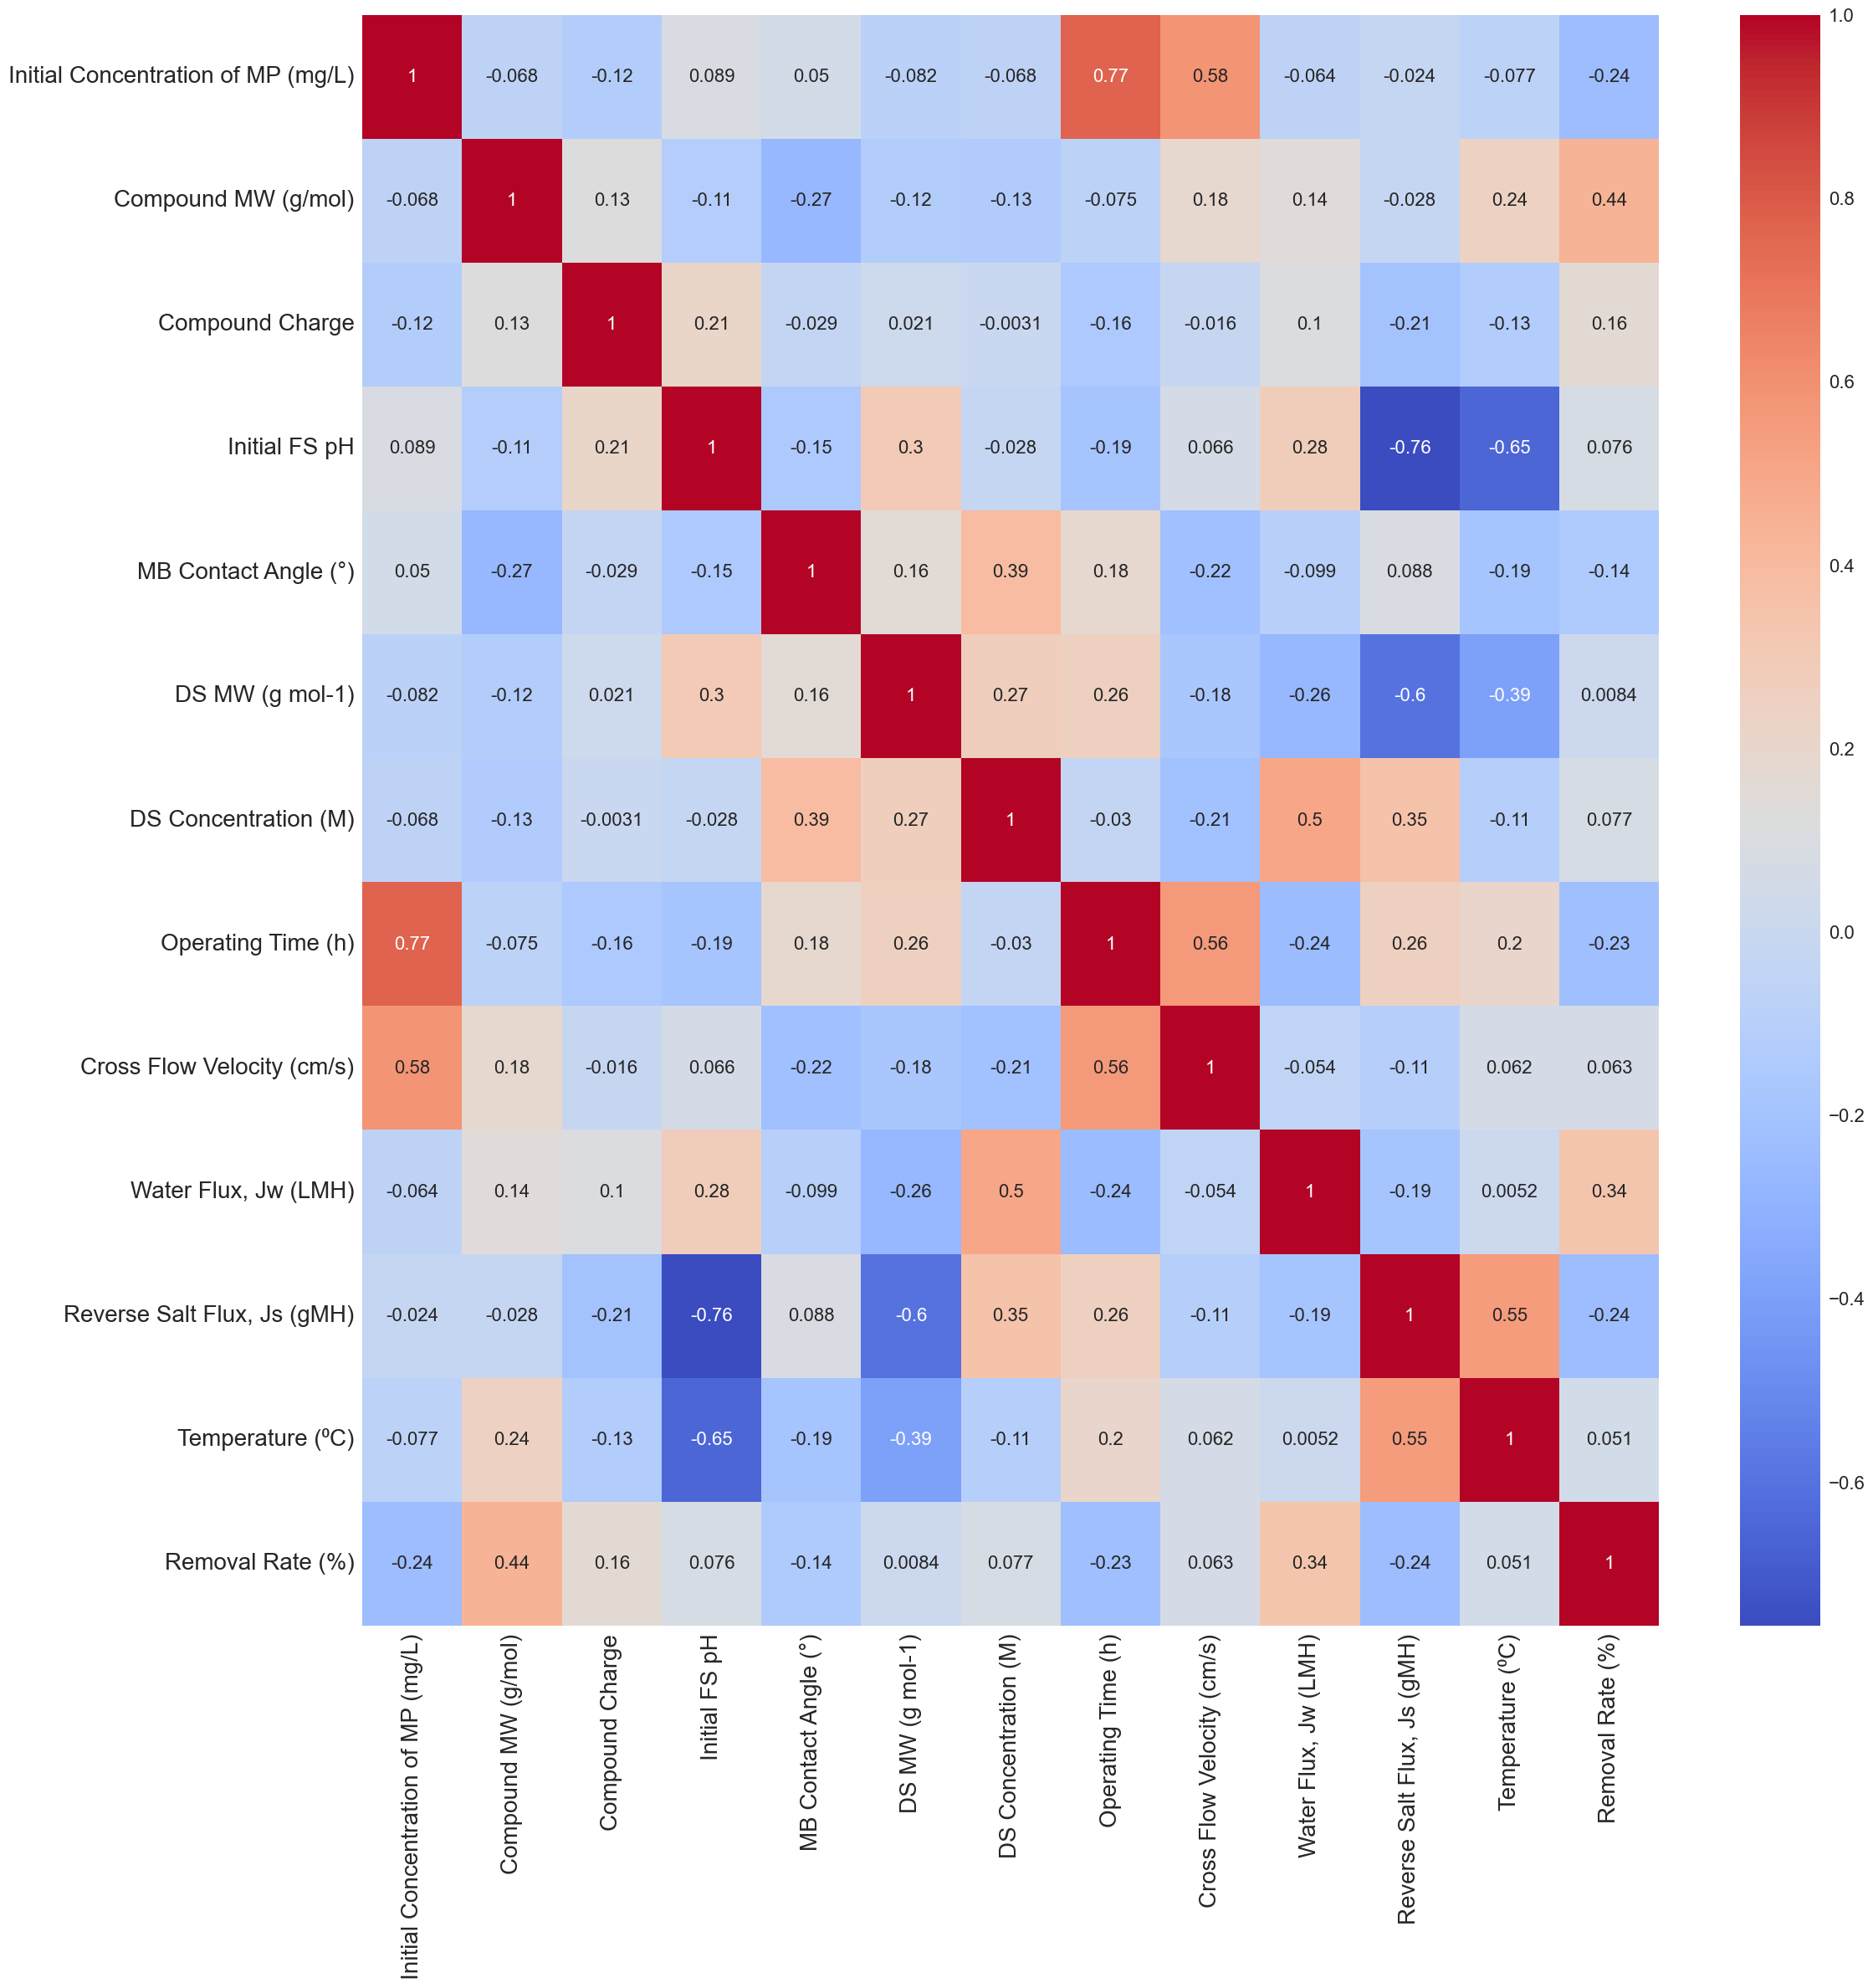

In [8]:
# Plotting correlation between parameters in dataset

plt.figure(figsize=(25,25))
my_correlation = df.corr()
sns.heatmap(my_correlation,annot=True, cmap='coolwarm',annot_kws={"size": 16})
ax = plt.gca()
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=360)
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=16)


In [8]:
# Refining the dataset removing inputs with very hitg correlation

df = df[['Micro Pollutant', 'MP Category', 'Initial Concentration of MP (mg/L)', 'Compound MW (g/mol)', 'Compound Charge', 'Initial FS pH','Type of MB', 'MB Contact Angle (°)', 'Draw Solution', 'DS MW (g mol-1)', 'DS Concentration (M)', 'Operating Time (h)', 'Cross Flow Velocity (cm/s)','Water Flux, Jw (LMH)','Reverse Salt Flux, Js (gMH)','Temperature (⁰C)', 'Removal Rate (%)']]



In [ ]:
plt.figure(figsize=(25,25))
my_correlation = df.corr()
sns.heatmap(my_correlation,annot=True, cmap='coolwarm',annot_kws={"size": 16})
ax = plt.gca()
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=360)
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=16)

In [ ]:
df

In [ ]:
eda()

In [ ]:
df.groupby('Type of MB').count()


In [ ]:
# One-hot encoding categorical parameters for ML

MP=pd.get_dummies(df['Micro Pollutant'])
MP_Cat=pd.get_dummies(df['MP Category'])
MB=pd.get_dummies(df['Type of MB'])
DS=pd.get_dummies(df['Draw Solution'])
df = pd.concat([df,MP,MP_Cat, MB,DS],axis=1)
df

In [ ]:
df.to_csv('modified_dataset.csv')


In [6]:
# Auto ML using PyCaret with all regression models available

best = compare_models() 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.3419,0.6819,0.6720,0.9633,0.0530,0.0342,0.8650
xgboost,Extreme Gradient Boosting,0.3166,0.8455,0.7519,0.9419,0.0640,0.0322,0.8790
et,Extra Trees Regressor,0.3171,1.4316,0.8955,0.8977,0.0693,0.0285,0.9490
rf,Random Forest Regressor,0.4978,1.5915,1.0857,0.8976,0.0830,0.0460,0.9040
lr,Linear Regression,0.6665,2.0505,1.3119,0.8405,0.1039,0.0638,1.5850
br,Bayesian Ridge,0.7671,2.1600,1.3429,0.8298,0.1076,0.0757,0.8090
lightgbm,Light Gradient Boosting Machine,0.7329,2.7281,1.4080,0.8289,0.1030,0.0684,1.0130
dt,Decision Tree Regressor,0.3629,2.6081,1.1442,0.8252,0.0878,0.0287,0.8390
ridge,Ridge Regression,0.8360,2.4052,1.4152,0.8141,0.1127,0.0829,0.8310
ada,AdaBoost Regressor,1.1918,2.7839,1.5925,0.7831,0.1551,0.1474,0.9030


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [7]:
table = pd.DataFrame(best)

# Save the table to an Excel file
table.to_excel('model_performance.xlsx', index=False)

In [10]:
 # Creating the ML model based on best models compared above: Gradient Boosting Regress
gbr=create_model('gbr')



,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4989,0.8916,0.9442,0.9627,0.0669,0.0411
1,0.1601,0.0633,0.2515,0.9913,0.0356,0.0246
2,0.6103,1.2789,1.1309,0.9234,0.0718,0.0520
3,0.2420,0.1491,0.3862,0.9915,0.0393,0.0267
4,0.2700,0.1803,0.4246,0.9758,0.0392,0.0284
5,0.3006,0.3963,0.6295,0.9718,0.0362,0.0247
6,0.7324,3.3331,1.8257,0.8861,0.1525,0.0816
7,0.2248,0.2578,0.5077,0.9727,0.0360,0.0238
8,0.2840,0.2553,0.5053,0.9598,0.0414,0.0279


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [6]:
tuned_gbr = tune_model(gbr, choose_better = True, n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6219,2.1140,1.4540,0.9117,0.0679,0.0394
1,0.1497,0.1761,0.4197,0.9759,0.0714,0.0308
2,0.5077,1.0690,1.0339,0.9359,0.0646,0.0416
3,0.1536,0.0883,0.2972,0.9949,0.0215,0.0130
4,0.3323,0.8057,0.8976,0.8917,0.0630,0.0294
5,0.4726,0.6384,0.7990,0.9546,0.0635,0.0441
6,1.3159,7.1453,2.6731,0.7558,0.1777,0.0997
7,0.1994,0.3244,0.5696,0.9656,0.0383,0.0174
8,0.3566,0.8945,0.9458,0.8591,0.0755,0.0345


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
predict_model(tuned_gbr)

In [11]:
save_model(gbr, model_name = 'GradientBoostingRegressor')



Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\mj943\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Initial Concentration of MP '
                                              '(mg/L)',
                                              'Compound MW (g/mol)',
                                              'Compound Charge', 'Initial FS pH',
                                              'MB Contact Angle (°)',
                                              'DS MW (g mol-1)',
                                              'DS Concentration (M)',
                                              'Operating Time (h)',
                                              'Cross Flow Velocity (cm/s)',
                                              'Reverse Salt Flux, Js (gMH)',
                                              'Te...
                                                               handle_missing='return_nan',
                          

In [54]:
import streamlit as st



In [56]:
# Define Streamlit app
def app():
    st.title('Water Flux (LMH) in FO Micropollutant Removal')
    st.write('Welcome to my web app!')
    st.write('Please input your values for the following features:')
    
    input_dict={'Micro Pollutant': Micro Pollutant, 'MP Category':MP Category, 'Initial Concentration of MP (mg/L)':Initial Concentration of MP (mg/L), 'Compound MW (g/mol)':Compound MW (g/mol), 'Compound Charge':Compound Charge, 'Initial FS pH':Initial FS pH,'Type of MB':Type of MB, 'MB Contact Angle (°)':MB Contact Angle (°), 'Draw Solution':Draw Solution, 'DS MW (g mol-1)':DS MW (g mol-1), 'DS Concentration (M)':DS Concentration (M), 'Operating Time (h)':Operating Time (h), 'Cross Flow Velocity (cm/s)':Cross Flow Velocity (cm/s),'Temperature (⁰C)':Temperature (⁰C), 'Removal Rate (%)':Removal Rate (%)}
    
    # Collect input features from user
    input_data = {}
    for col in df.columns:
        if col != 'Water Flux, Jw (LMH)':
            if col in ['Micro Pollutant', 'MP Category','Type of MB','Draw Solution']:
                input_data[col] = st.selectbox(col, df[col].unique())
            else:
                input_data[col] = st.number_input(col, step=0.5)
    
# Predict target value and display result
    prediction = predict_model(gbr, input_data)
    st.write('The predicted water flux is:', prediction['Label'][0])

# Run Streamlit app
if __name__ == '__main__':
    app()

SyntaxError: invalid syntax (2953801961.py, line 7)

In [11]:
! pip install streamlit
import streamlit as st

def app(): 
    st.title('Water Flux (LMH) Predictor')
    st.write('Welcome to my web app!')
    st.write('Please input your values for the following features:')

    # allow the user to select multiple options
    MP_Type = df["Micro Pollutant"].unique()
    MB_Type = df["Type of MB"].unique()
    DS_Type = df["Draw Solution"].unique()

    MP = st.multiselect("Micropollutant name:", MP_Type)
    # print the selected options
    st.write("Micropolutant Type", MP)

    MB = st.selectbox("Membrane Type:", MB_Type)
    MP_Conc = st.number_input("MP Concentration (g mol-1):", 0, 1000)
    MP_MW = st.number_input("MP Molecular Weigth:", 0, 1000)
    Charge = st.slider("Charge:", -1, 1)
    FS_pH = st.slider("Initial FS pH:", 0.0, 14.0, step=0.5)
    Contact_angle = st.number_input("MB Contact Angle:", 0, 180)
    DS = st.selectbox("Draw Solute Type:", DS_Type)
    DS_MW = st.number_input("MP Molecular Weigth:", 0, 1000)
    DS_Conc = st.number_input("MP Concentration (g mol-1):", 0, 1000)
    Op_Time = st.number_input("Operation Time (h):", 0, 100)
    Velocity = st.number_input("Flow Velocity (cm/s):", 0, 50)
    Temp = st.slider("Temperature (C)", 0.0, 40.0, step=0.5)
    Rejection = st.slider("Rejection Rate (%)", 0, 100)

    def predict(): 
        # Perform the prediction based on the user input
        input_data = {
            "Micropollutant": MP,
            "Membrane Type": MB,
            "MP Concentration": MP_Conc,
            "MP Molecular Weight": MP_MW,
            "Charge": Charge,
            "Initial FS pH": FS_pH,
            "MB Contact Angle": Contact_angle,
            "Draw Solute Type": DS,
            "DS Molecular Weight": DS_MW,
            "DS Concentration": DS_Conc,
            "Operation Time": Op_Time,
            "Velocity": Velocity,
            "Temperature": Temp,
            "Rejection Rate": Rejection
        }

        prediction = predict_model(gbr, data=input_data)
        st.write('The predicted water flux is:', prediction['LMH'][0])

    trigger = st.button('Predict', on_click=predict)

# Run Streamlit app
if __name__ == '__main__':
    app()
! stremlit run MPFO_Jw_R%.ipynb

2023-05-15 14:55:59.646 
  command:

    streamlit run C:\Users\mj943\Anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2023-05-15 14:55:59.648 Session state does not function when running a script without `streamlit run`
'stremlit' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
df.columns

Index(['Micro Pollutant', 'MP Category', 'Initial Concentration of MP (mg/L)',
       'Compound MW (g/mol)', 'Compound Charge', 'Initial FS pH', 'Type of MB',
       'MB Contact Angle (°)', 'Draw Solution', 'DS MW (g mol-1)',
       'DS Concentration (M)', 'Operating Time (h)',
       'Cross Flow Velocity (cm/s)', 'Water Flux, Jw (LMH)',
       'Reverse Salt Flux, Js (gMH)', 'Temperature (⁰C)', 'Removal Rate (%)'],
      dtype='object')

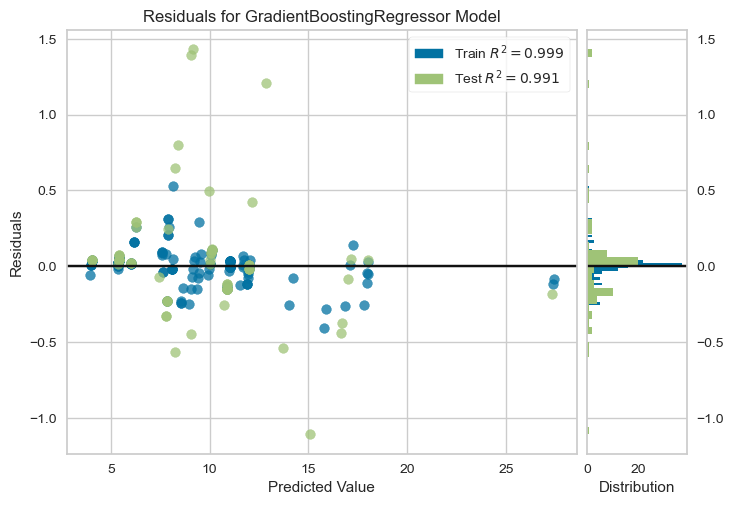

In [10]:
# Plotting prediction accuracy of GBR
plot_model(gbr)

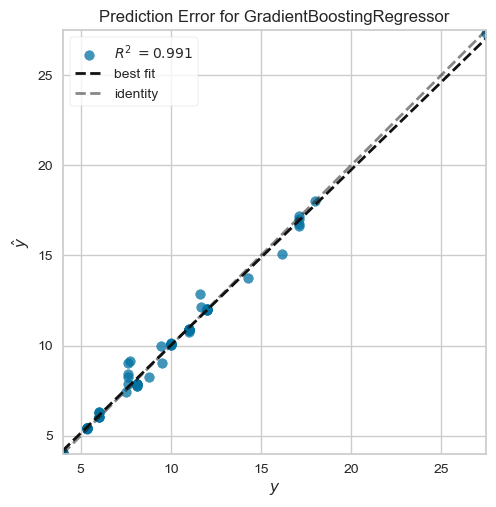

In [11]:
plot_model(gbr, plot = 'error')

In [14]:
 # Creating the ML model based on best models compared above: Extreme Gradient Boosting 

xgb = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1909,0.1635,0.4044,0.9932,0.0342,0.0183
1,0.1980,0.3861,0.6214,0.9471,0.0998,0.0432
2,0.5326,0.6743,0.8212,0.9596,0.0632,0.0517
3,0.1531,0.1294,0.3597,0.9926,0.0377,0.0156
4,0.2297,0.2704,0.5200,0.9636,0.0399,0.0206
5,0.3160,0.7636,0.8738,0.9457,0.0598,0.0250
6,0.8938,4.4651,2.1131,0.8474,0.1675,0.0872
7,0.1989,0.4222,0.6498,0.9552,0.0421,0.0155
8,0.4212,1.1749,1.0839,0.8149,0.0892,0.0418


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Plotting prediction accuracy of XGB

plot_model(xgb)
plot_model(xgb, plot = 'error')

In [ ]:
interpret_model(xgb)

In [ ]:
# Creating the ML model based on best models compared above: Random Forest

rf = create_model('rf')

# Plotting prediction accuracy of RF
plot_model(rf)
plot_model(rf, plot = 'error')

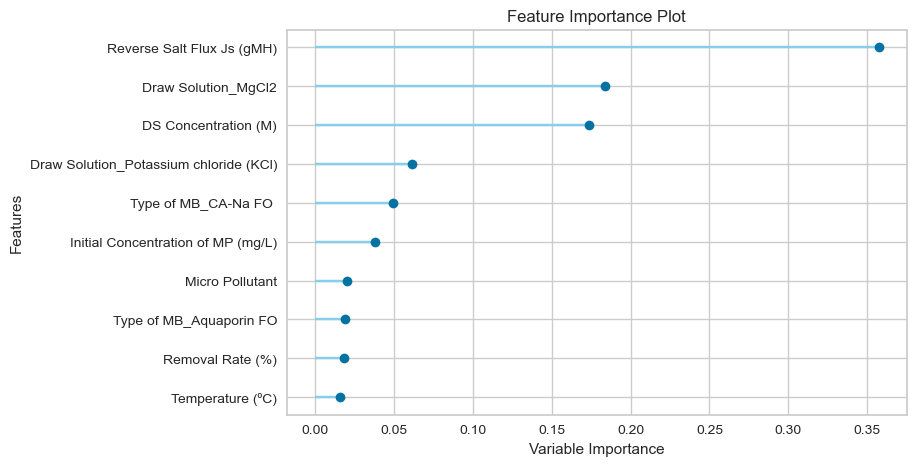

In [17]:
# Feature importance plot

plot_model(gbr, plot = 'feature')


In [ ]:
interpret_model(rf)
plot_model(rf, plot = 'feature')

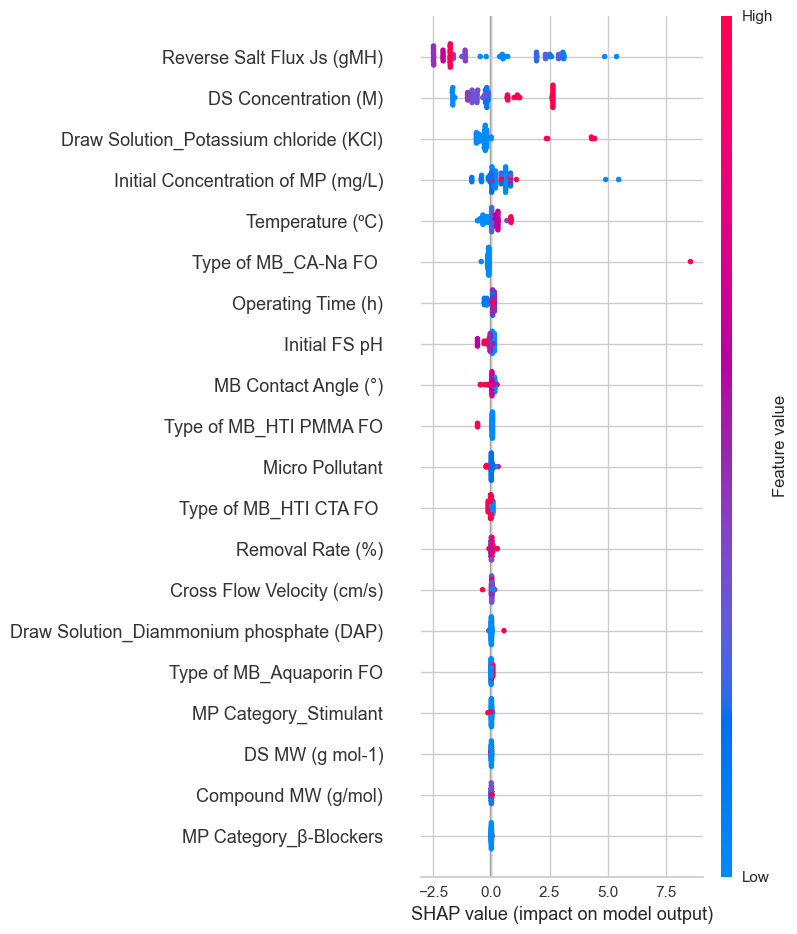

In [16]:
interpret_model(xgb)

In [44]:
# Setting up a new model by choosing Rejection rate (R) as the prediction target

setup(data = df, target = 'Removal Rate (%)' ,session_id = 123 ) 
#remove_outliers = True
#
# feature_selection = True

,Description,Value
0,Session id,123
1,Target,Removal Rate (%)
2,Target type,Regression
3,Original data shape,"(234, 17)"
4,Transformed data shape,"(234, 48)"
5,Transformed train set shape,"(163, 48)"
6,Transformed test set shape,"(71, 48)"
7,Numeric features,12
8,Categorical features,4
9,Rows with missing values,12.4%


In [ ]:
df.['Removal Rate (%)']

In [ ]:
plt.figure(figsize=(25,25))
my_correlation = df.corr()
sns.heatmap(my_correlation,annot=True, cmap='coolwarm',annot_kws={"size": 16})
ax = plt.gca()
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=360)
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=16)

In [43]:
# Auto ML using PyCaret with all regression models available

best = compare_models() 

RuntimeError: This function/method requires the users to run setup() first.
More info: https://pycaret.gitbook.io/docs/get-started/quickstart

In [45]:
 # Creating the ML model based on best models compared above: Gradient Boosting Regress
gbr=create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3622,25.4172,5.0415,0.8073,0.0646,0.0419
1,4.6473,45.5534,6.7493,0.9570,0.1822,0.1277
2,11.6610,306.6073,17.5102,0.2691,0.2668,0.1977
3,8.2104,174.3496,13.2041,0.8054,0.4262,0.3694
4,6.3845,70.9263,8.4218,0.8947,0.3514,0.2791
5,6.8675,156.9100,12.5264,0.6914,0.2411,0.1437
6,9.7040,229.5679,15.1515,0.2611,0.2384,0.1678
7,7.1412,111.3615,10.5528,0.8372,0.4388,0.3855
8,8.7321,175.4474,13.2457,0.5407,0.2091,0.1474


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [46]:
tuned_gbr = tune_model(gbr, choose_better = True, n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.6587,32.7765,5.7251,0.7515,0.0697,0.0440
1,6.0282,82.3194,9.0730,0.9224,0.2510,0.1728
2,10.3016,261.6980,16.1771,0.3761,0.2370,0.1690
3,7.3433,188.0156,13.7119,0.7902,0.4528,0.4239
4,6.9796,93.2099,9.6545,0.8617,0.4084,0.3520
5,8.7433,169.2180,13.0084,0.6672,0.2383,0.1674
6,5.5863,51.8366,7.1998,0.8332,0.1030,0.0760
7,6.0732,75.5489,8.6919,0.8895,0.4038,0.3402
8,8.6144,122.4819,11.0672,0.6794,0.1740,0.1323


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


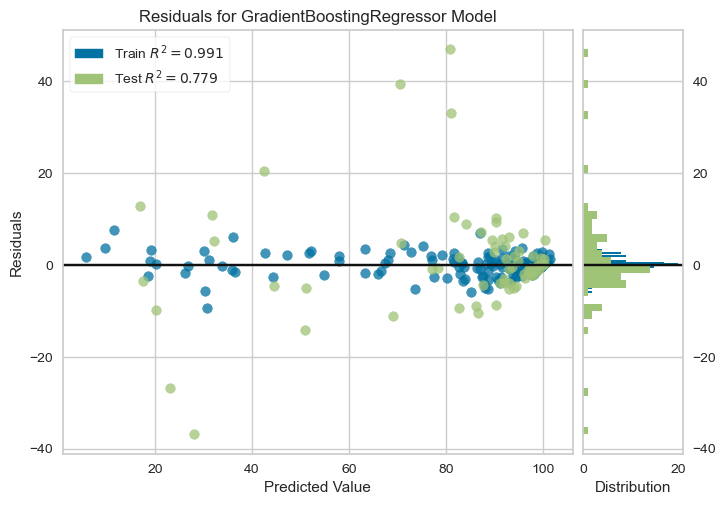

In [47]:
# Plotting prediction accuracy of GBR
plot_model(tuned_gbr)

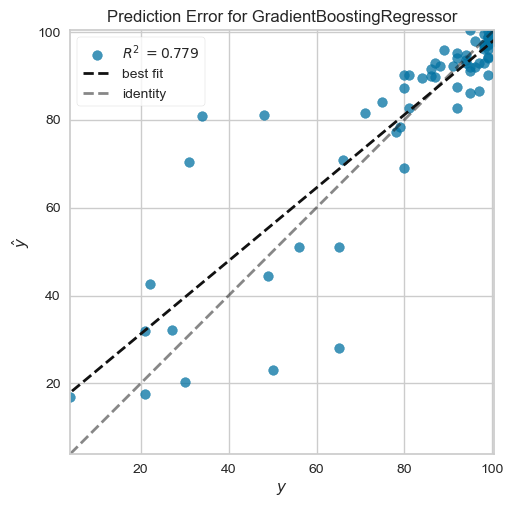

In [49]:
plot_model(tuned_gbr, plot = 'error')

In [36]:
plot_model(tuned_xgb, plot = 'auc')

ValueError: Plot Not Available. Please see docstring for list of available Plots.

In [28]:
 # Creating the ML model based on best models compared above: Extreme Gradient Boosting 

xgb = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.0778,86.1324,9.2808,0.3469,0.1127,0.0718
1,5.0366,67.4582,8.2133,0.9364,0.2266,0.1401
2,12.8053,416.9919,20.4204,0.0059,0.3039,0.2163
3,7.9129,234.9921,15.3295,0.7377,0.4801,0.4708
4,5.6800,52.0294,7.2131,0.9228,0.2963,0.2190
5,10.3821,255.9689,15.9990,0.4966,0.2768,0.2011
6,8.9695,235.8743,15.3582,0.2408,0.2589,0.1575
7,6.3850,110.0107,10.4886,0.8392,0.4309,0.3540
8,7.4121,127.6543,11.2984,0.6658,0.1646,0.1099


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [29]:
tuned_xgb = tune_model(xgb, choose_better = True, n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.9254,33.0246,5.7467,0.7496,0.0693,0.0469
1,5.6017,59.4290,7.7090,0.9440,0.2774,0.1665
2,10.3408,247.9189,15.7454,0.4090,0.2480,0.1793
3,8.2132,198.7430,14.0976,0.7782,0.4074,0.3212
4,5.2973,78.1196,8.8385,0.8841,0.4076,0.3324
5,6.8854,116.2291,10.7810,0.7714,0.2183,0.1415
6,7.1218,117.9324,10.8597,0.6204,0.1669,0.1019
7,5.7067,76.3875,8.7400,0.8883,0.4294,0.3801
8,7.7671,157.8263,12.5629,0.5868,0.1853,0.1235


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


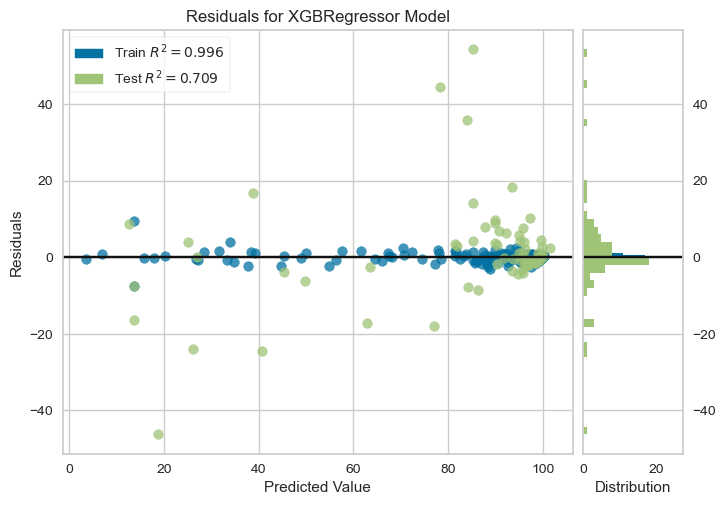

In [30]:
# Plotting prediction accuracy of XGB

plot_model(tuned_xgb)

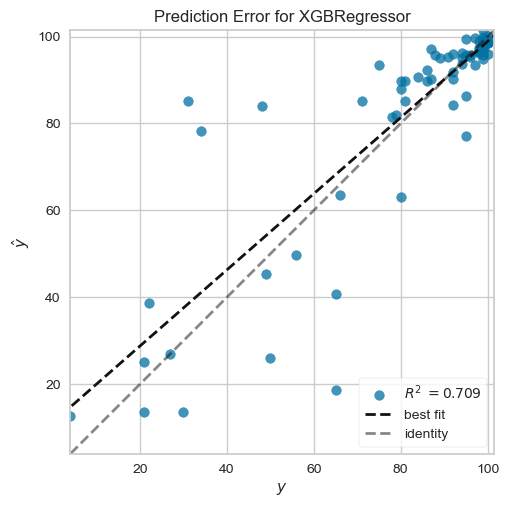

In [31]:
plot_model(tuned_xgb, plot = 'error')

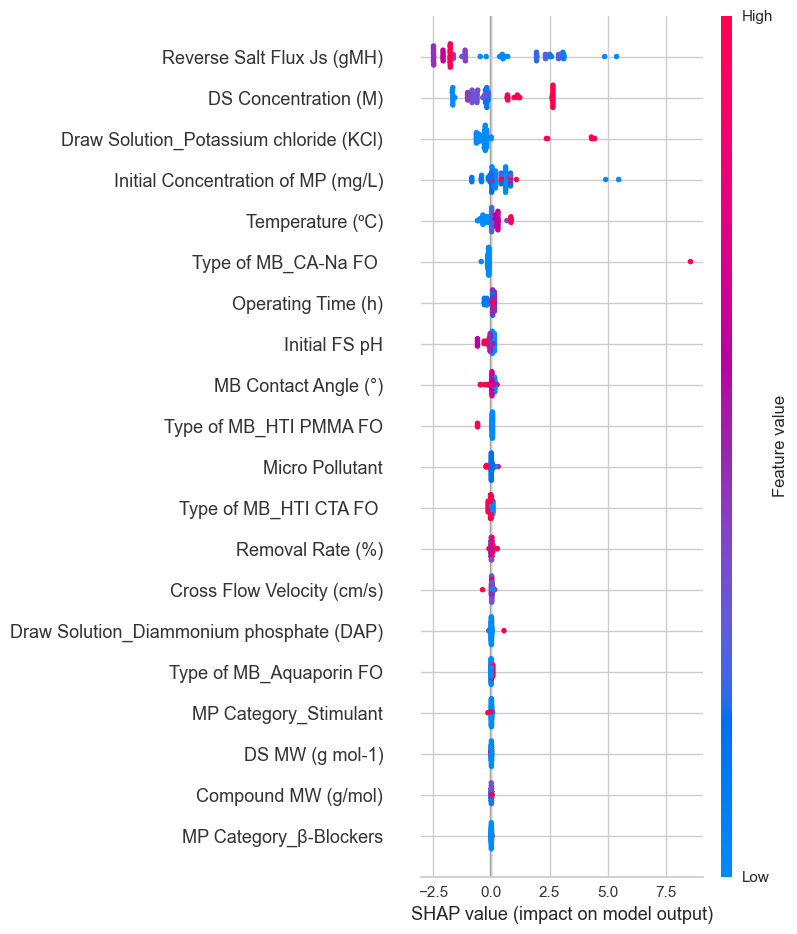

In [15]:
interpret_model(xgb)

In [ ]:
# Creating the ML model based on best models compared above: Random Forest
    
rf = create_model('rf')

In [ ]:
# Plotting prediction accuracy of XGB

plot_model(xgb)

In [ ]:
# Plotting prediction accuracy of RF

plot_model(rf)

In [ ]:
plot_model(rf, plot = 'error')

In [ ]:
interpret_model(rf)

In [ ]:
svr = create_model('svm')

In [ ]:
# Plotting prediction accuracy of SVR

plot_model(svr)

In [ ]:
! pip install shap
interpret_model(rf)


In [ ]:
plot_model(svr, plot = 'error')

In [ ]:
plot_model(gbr, plot = 'feature')

In [ ]:
plot_model(rf, plot = 'feature')

In [7]:
create_app(gbr)
#launch(share=True)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [7]:
! pip install streamlit



interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

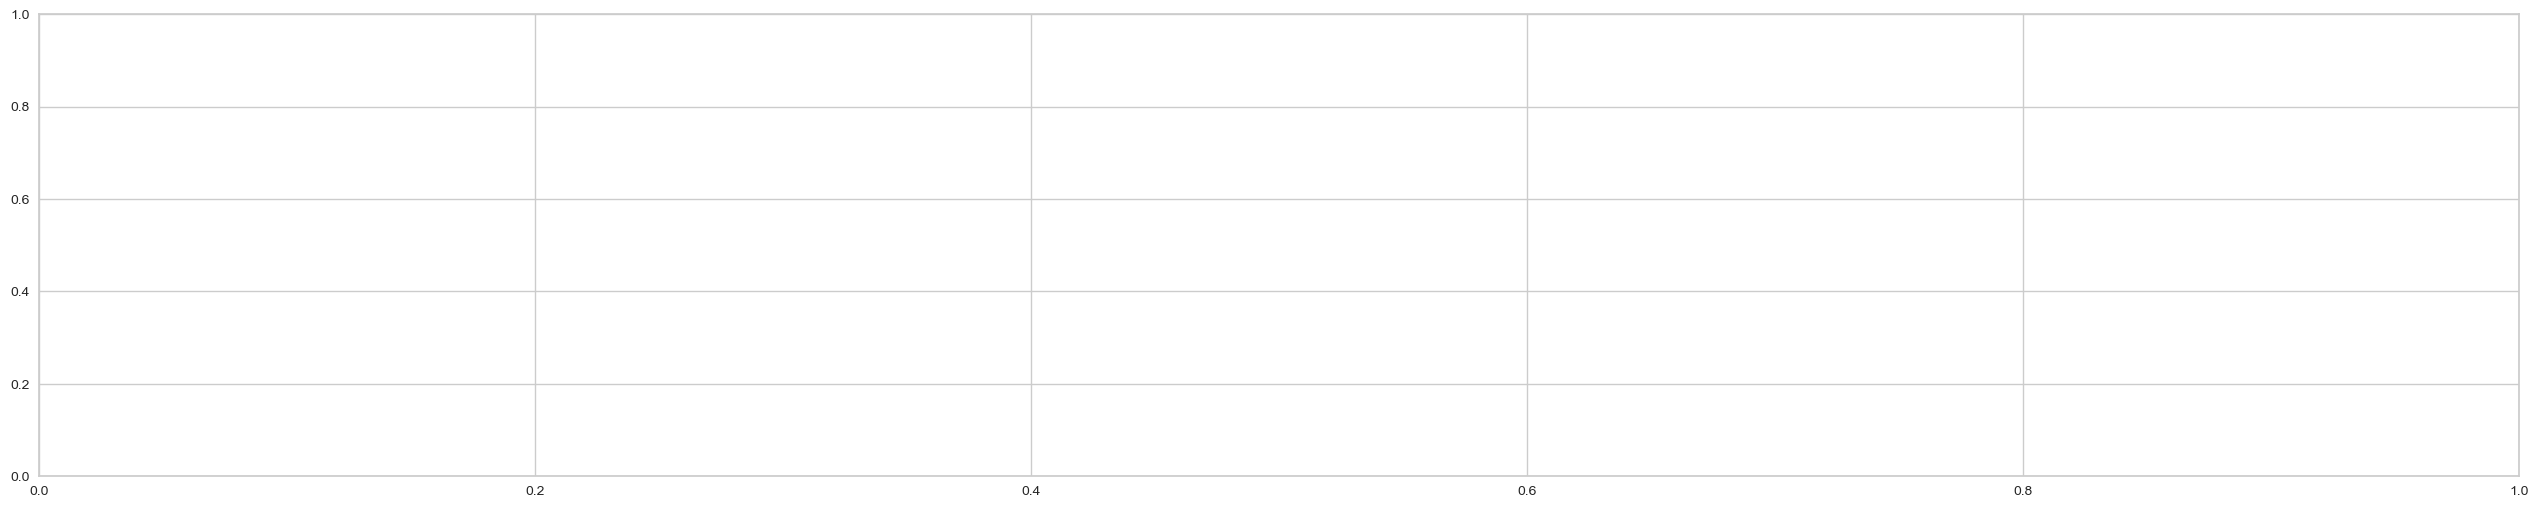

In [34]:
evaluate_model(tuned_xgb)


In [ ]:
! pip install gradio

In [ ]:
pip install pycaret[mlops]